In [281]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
df = pd.read_csv('energydata_complete.csv')

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [284]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [285]:
df['date'] = pd.to_datetime(df['date'])

In [286]:
df.drop(columns=['rv1', 'rv2'], inplace=True)

In [287]:
df.drop_duplicates(inplace=True)

In [288]:
df.set_index('date', inplace=True)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [290]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [291]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [292]:
df.shape

(19735, 26)

In [293]:
df.nunique()

Appliances       92
lights            8
T1              722
RH_1           2547
T2             1650
RH_2           3376
T3             1426
RH_3           2618
T4             1390
RH_4           2987
T5             2263
RH_5           7571
T6             4446
RH_6           9709
T7             1955
RH_7           5891
T8             2228
RH_8           6649
T9              924
RH_9           3388
T_out          1730
Press_mm_hg    2189
RH_out          566
Windspeed       189
Visibility      413
Tdewpoint      1409
dtype: int64

In [294]:
# Use only required columns
df = df[['Appliances', 'T_out', 'RH_out', 'Visibility', 'Tdewpoint']]

# Resample data to hourly means
df = df.resample('h').mean()


In [295]:
df.isnull().sum()

Appliances    0
T_out         0
RH_out        0
Visibility    0
Tdewpoint     0
dtype: int64

In [296]:
df.duplicated().sum()

0

In [297]:
df.skew(numeric_only=True)

Appliances    2.388553
T_out         0.536834
RH_out       -0.923837
Visibility    0.445259
Tdewpoint     0.240999
dtype: float64

In [298]:

app_log = np.log(df['Appliances'])
skewness = round(app_log.skew(),5)
skewness

0.99609

In [299]:
df.shape

(3290, 5)

# Univariate analysis

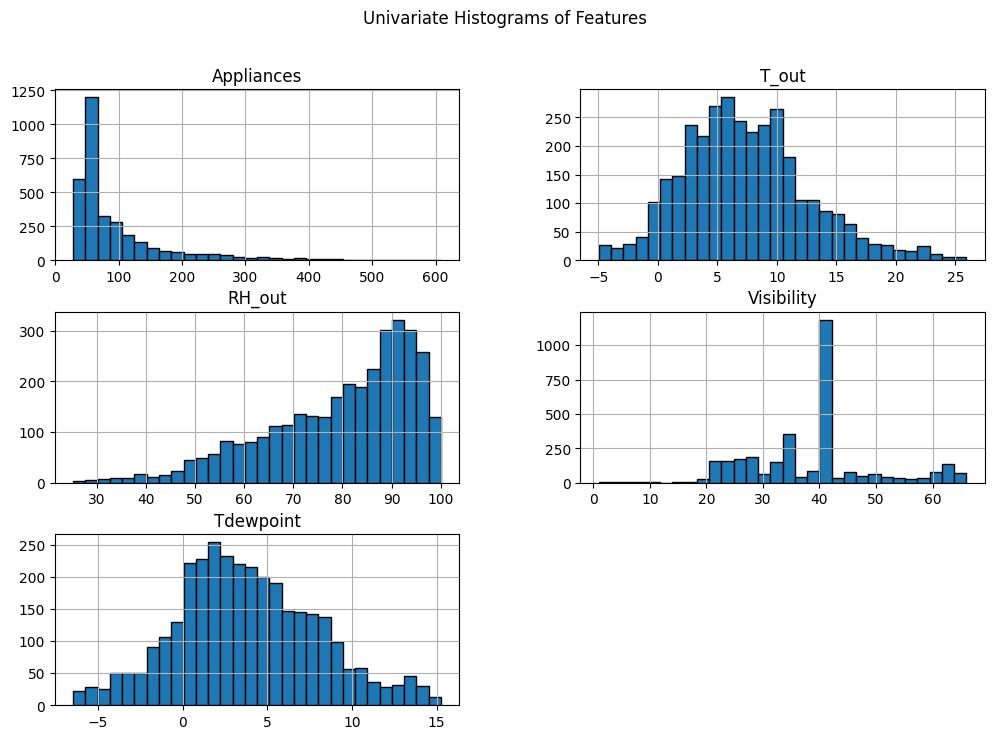

c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

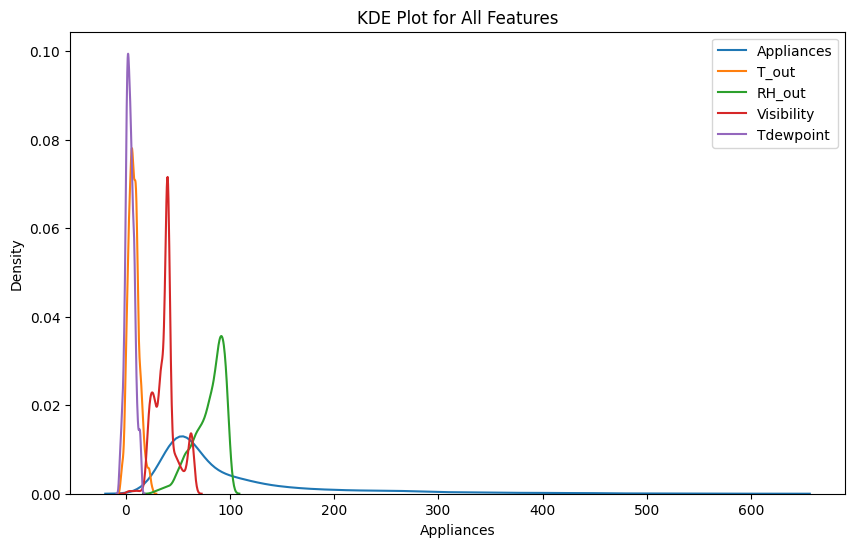

In [300]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Univariate Histograms of Features")
plt.show()

# KDE plots
plt.figure(figsize=(10, 6))
for col in df.columns:
    sns.kdeplot(df[col], label=col)
plt.title("KDE Plot for All Features")
plt.legend()
plt.show()


# Bivariate

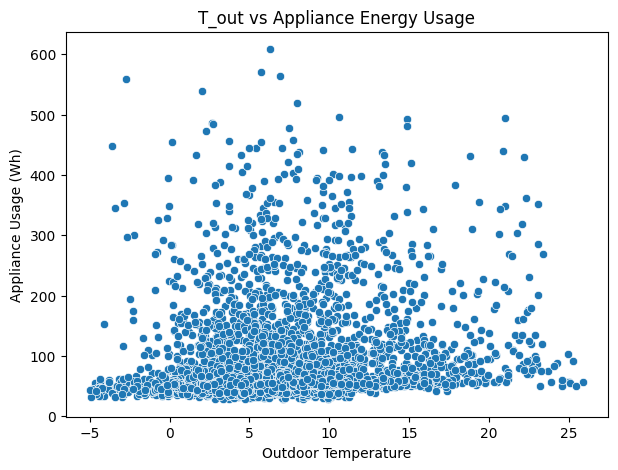

In [301]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='T_out', y='Appliances', data=df)
plt.title("T_out vs Appliance Energy Usage")
plt.xlabel("Outdoor Temperature")
plt.ylabel("Appliance Usage (Wh)")
plt.show()


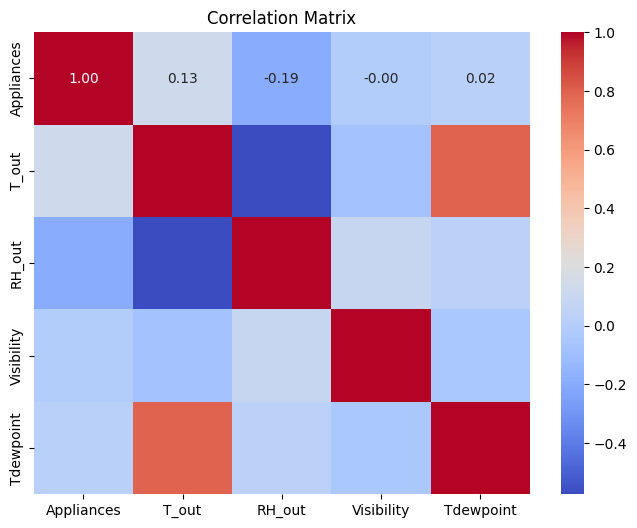

In [302]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Multivariate

c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

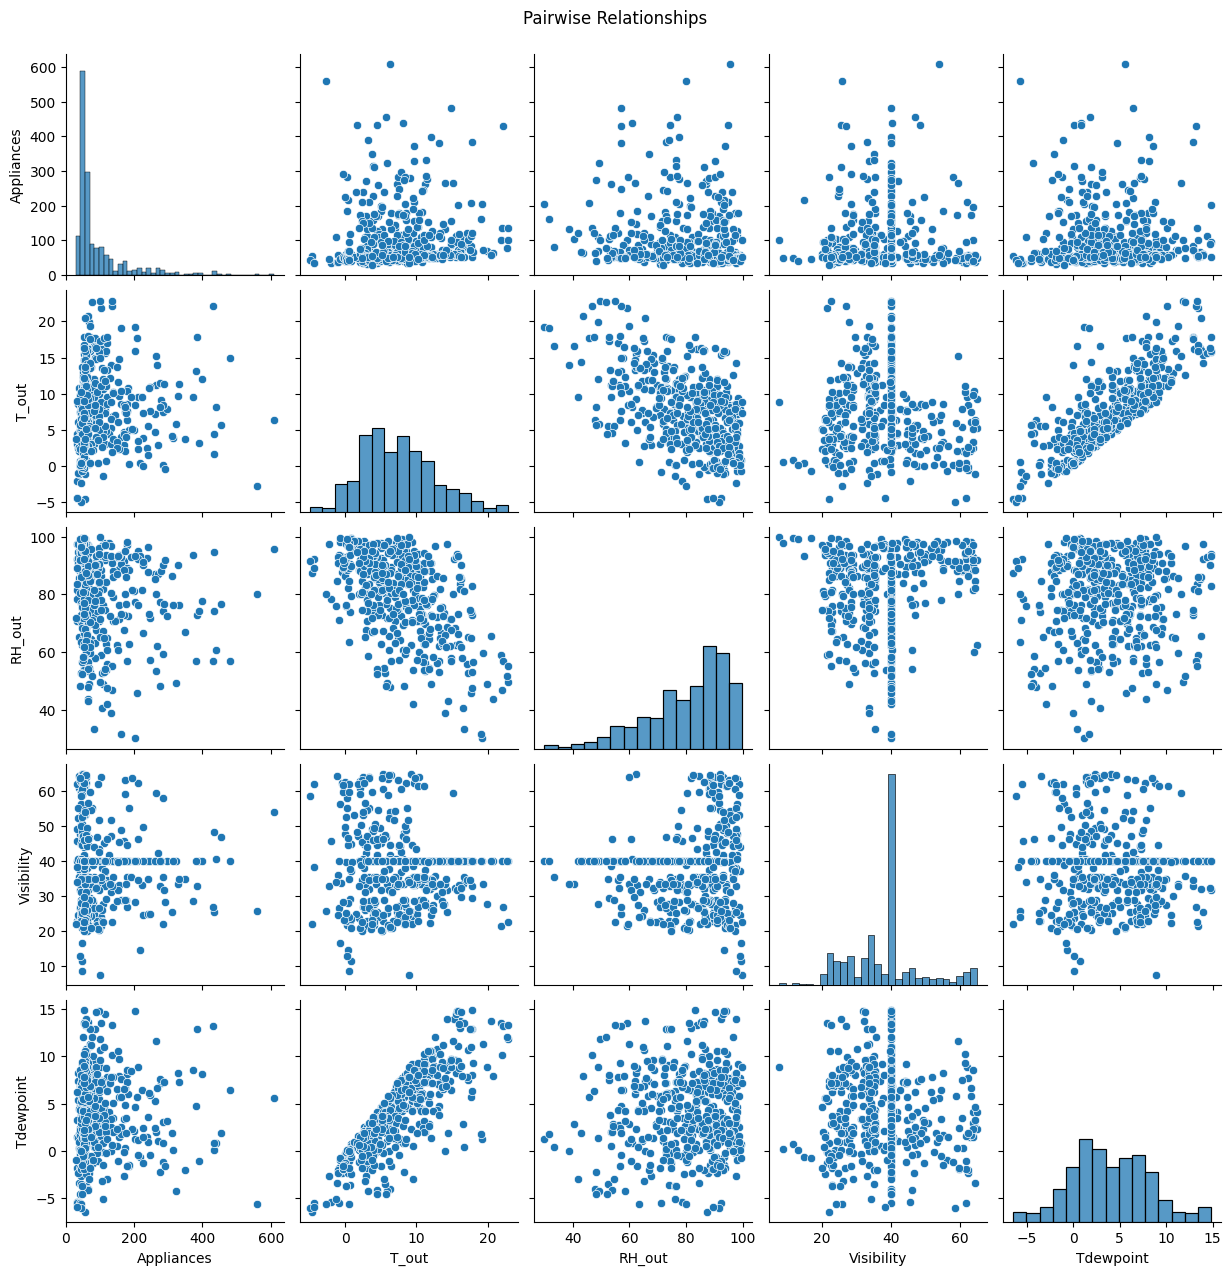

In [303]:
sns.pairplot(df.sample(500))  # Sampling to avoid overload
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


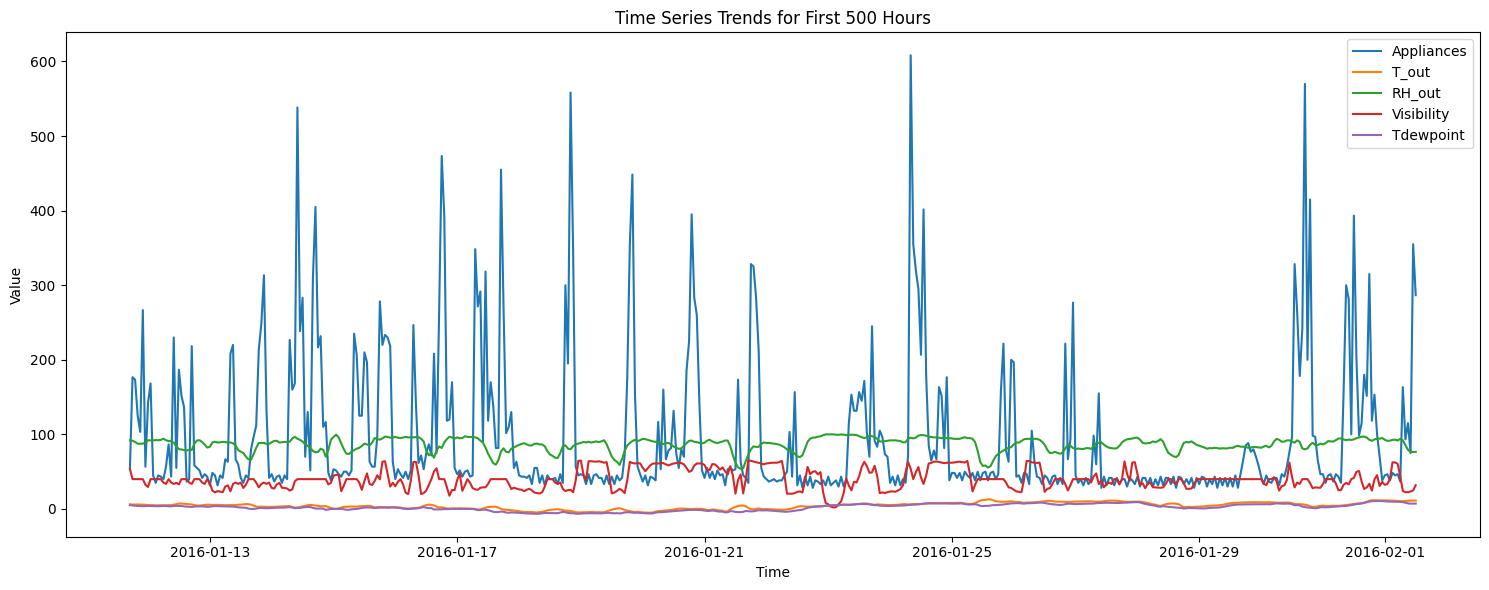

In [304]:
plt.figure(figsize=(15, 6))
for col in df.columns:
    plt.plot(df.index[:500], df[col][:500], label=col)  # First 500 hours
plt.legend()
plt.title("Time Series Trends for First 500 Hours")
plt.xlabel("Time")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


In [305]:
# TIME FEATURES
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# LAG FEATURES
df['Appliances_lag1'] = df['Appliances'].shift(1)
df['Appliances_lag24'] = df['Appliances'].shift(24)

# ROLLING AVERAGES
df['Appliances_roll3'] = df['Appliances'].rolling(window=3).mean()
df['Appliances_roll6'] = df['Appliances'].rolling(window=6).mean()

# Drop NA rows created by shift/rolling
df.dropna(inplace=True)

In [306]:
df.head()

,Appliances,T_out,RH_out,Visibility,Tdewpoint,hour,day_of_week,is_weekend,Appliances_lag1,Appliances_lag24,Appliances_roll3,Appliances_roll6
date,,,,,,,,,,,,
2016-01-12 17:00:00,218.333333,6.041667,79.166667,33.583333,2.633333,17,1,0,40.000000,55.000000,98.333333,128.333333
2016-01-12 18:00:00,58.333333,5.150000,87.500000,40.000000,3.225000,18,1,0,218.333333,176.666667,105.555556,106.944444
2016-01-12 19:00:00,55.000000,4.675000,91.833333,40.000000,3.400000,19,1,0,58.333333,173.333333,110.555556,90.833333
2016-01-12 20:00:00,51.666667,4.583333,92.166667,40.000000,3.400000,20,1,0,55.000000,125.000000,55.000000,76.666667
2016-01-12 21:00:00,41.666667,4.950000,89.750000,35.416667,3.441667,21,1,0,51.666667,103.333333,49.444444,77.500000


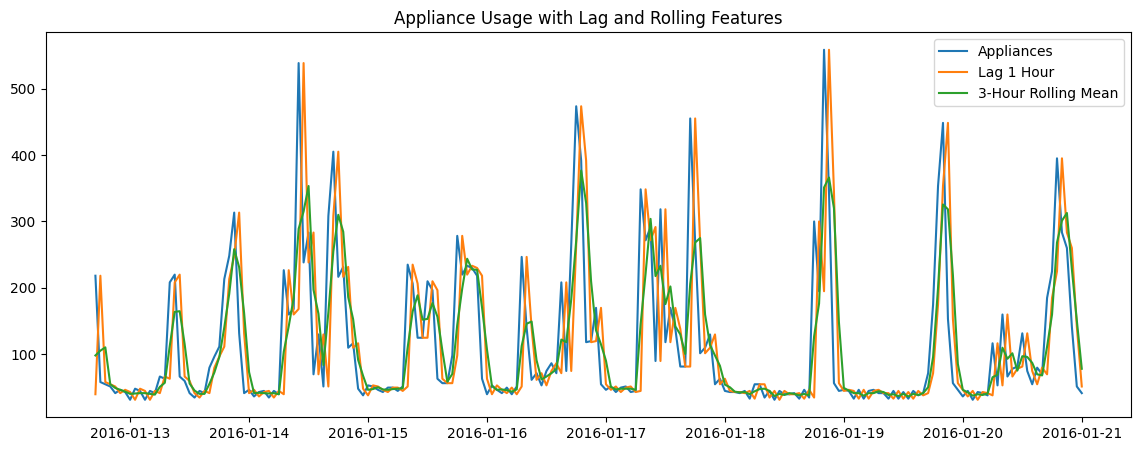

In [307]:

plt.figure(figsize=(14, 5))
plt.plot(df['Appliances'].iloc[:200], label='Appliances')
plt.plot(df['Appliances_lag1'].iloc[:200], label='Lag 1 Hour')
plt.plot(df['Appliances_roll3'].iloc[:200], label='3-Hour Rolling Mean')
plt.title("Appliance Usage with Lag and Rolling Features")
plt.legend()
plt.show()


In [308]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select features and target
features = ['T_out', 'RH_out', 'Visibility', 'Tdewpoint', 
            'hour', 'day_of_week', 'is_weekend',
            'Appliances_lag1', 'Appliances_lag24', 
            'Appliances_roll3', 'Appliances_roll6']
target = 'Appliances'

In [309]:
# Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + [target]])

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=features + [target], index=df.index)


In [310]:
# Sequence creation (LSTM needs 3D input)
def create_sequences(data, target_col, seq_len=48):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len:i][features].values)
        y.append(data.iloc[i][target_col])
    return np.array(X), np.array(y)

In [311]:
X, y = create_sequences(scaled_df, target)


In [312]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [313]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()




c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 48, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,905 (124.63 KB)

 Trainable params: 31,905 (124.63 KB)

 Non-trainable params: 0 (0.00 B)

In [314]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32,
                    callbacks=[early_stop])


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - loss: 0.0269 - val_loss: 0.0115
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0167 - val_loss: 0.0138
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0145 - val_loss: 0.0112
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0151 - val_loss: 0.0104
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0142 - val_loss: 0.0114
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0149 - val_loss: 0.0107
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0143 - val_loss: 0.0100
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0138 - val_loss: 0.0099
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0153 - val_loss: 0.0114
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0146 - val_loss: 0.0101
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0130 - val_loss: 0.0097
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.

In [315]:
y_pred = model.predict(X_test)

# Inverse transform Appliance values only
appliance_scaler = MinMaxScaler()
appliance_scaler.min_, appliance_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]
y_test_inv = appliance_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = appliance_scaler.inverse_transform(y_pred).flatten()

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


In [316]:
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.3f}")

MAE:  31.53
RMSE: 50.69
MAPE: 32.76%
R² Score: 0.448


In [317]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Prepare flat features (no time window)
flat_df = df.dropna()[features + ['Appliances']]
X = flat_df[features]
y = flat_df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

xgb = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"XGBoost>> MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%, R²: {r2:.3f}")


XGBoost>> MAE: 16.50, RMSE: 31.87, MAPE: 15.62%, R²: 0.785


In [318]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [319]:
y_pred_ran = model.predict(X_test)

In [320]:
mae_ran = mean_absolute_error(y_test, y_pred_ran)
rmse_ran = np.sqrt(mean_squared_error(y_test, y_pred_ran))
mape_ran = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2_ran = r2_score(y_test, y_pred_ran)

In [321]:
print("Model Performance of Random Forest:")
print(f"MAE  = {mae_ran:.2f}")
print(f"RMSE = {rmse_ran:.2f}")
print(f"MAPE = {mape_ran:.2f}%")
print(f"R²   = {r2_ran:.2f}")

Model Performance of Random Forest:
MAE  = 16.93
RMSE = 32.06
MAPE = 15.62%
R²   = 0.78


In [322]:
print("X shape:", X.shape)

X shape: (3266, 11)


# Using XGBoost

In [330]:
import joblib

# Save the trained XGBoost model to disk
joblib.dump(xgb, "xgboost_appliance_model.pkl")

print("Model saved as 'xgboost_appliance_model.pkl'")


Model saved as 'xgboost_appliance_model.pkl'


In [331]:
# To load the model later
loaded_model = joblib.load("xgboost_appliance_model.pkl")


<Figure size 1000x600 with 0 Axes>

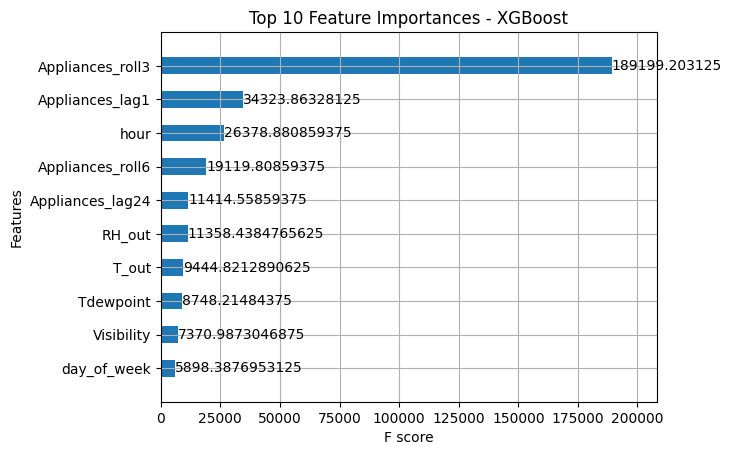

In [332]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=10, importance_type='gain', height=0.5)
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()